In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain  = [[0, 1], [0, 1]]

x0 = [[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]]
a0 = [2.0, -1.0, 1.5]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]], [2.0, -1.0, 1.5], 2, 3)

In [4]:
# Define noise level
noise_level = 0.1

# Seed for noise
# Random.seed!(22)

0.1

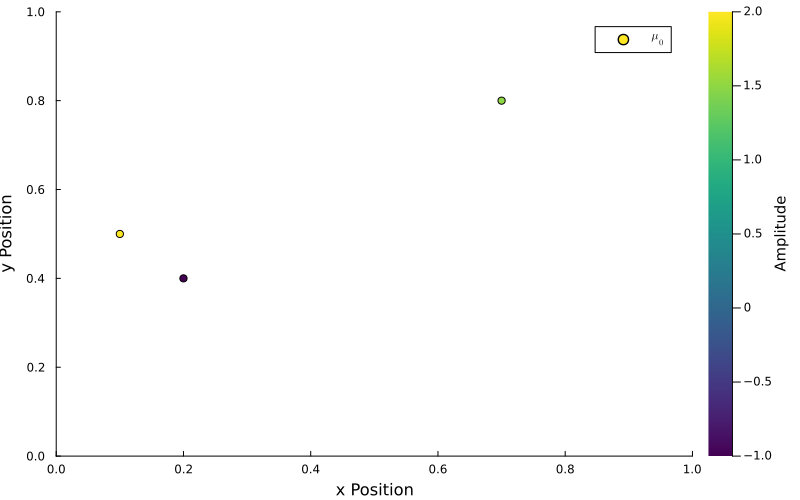

In [5]:
# Define the plot
num_points = 50

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

plt_gt = deepcopy(plt)
plot_spikes!(plt_gt, μ0, label=L"μ_0", colorscheme=:viridis)

In [6]:
ops = gaussian_operators_2D(0.05, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601), var"#Φ#30"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601)), var"#adjΦ#31"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 26

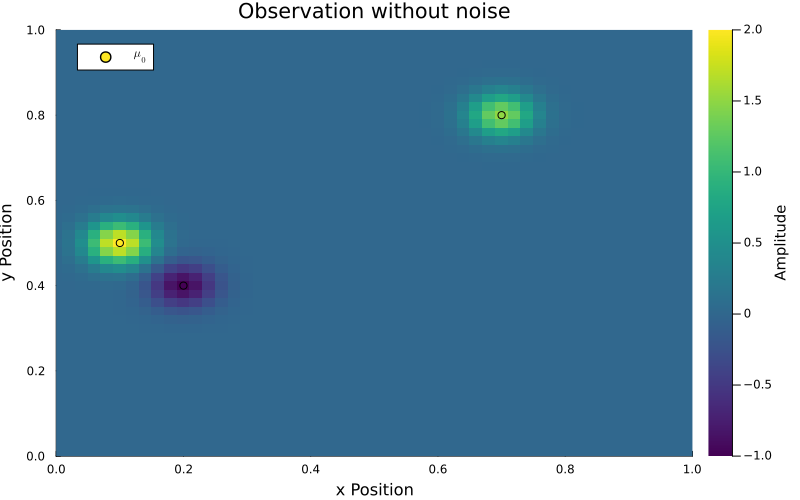

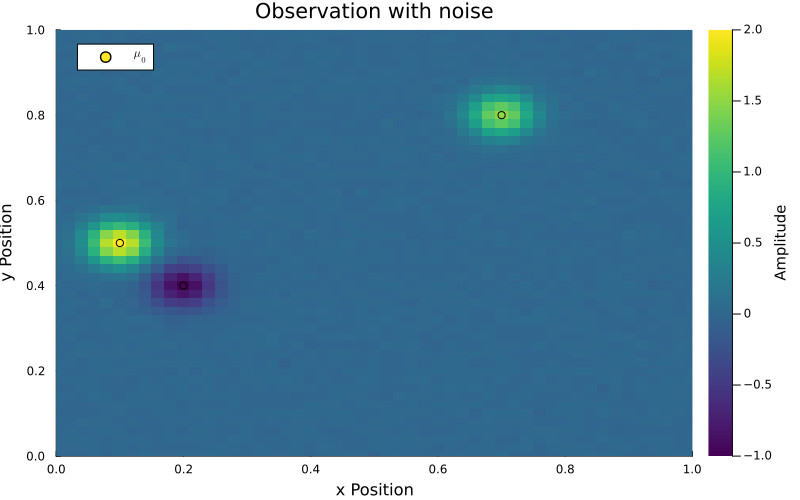

In [7]:
y0 = ops.Φ(x0[1], x0[2], a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = randn(length(y0))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)
plt_obs_noise = deepcopy(plt)

heatmap!(plt_obs, grid, grid, reshape(y0, size(plt_grid_x1)), title="Observation without noise", color=:viridis)
plot_spikes!(plt_obs, μ0, label=L"μ_0")
display(plt_obs)
heatmap!(plt_obs_noise, grid, grid, reshape(y, size(plt_grid_x1)), title="Observation with noise", color=:viridis)
plot_spikes!(plt_obs_noise, μ0, label=L"μ_0")

## Pre-certificate

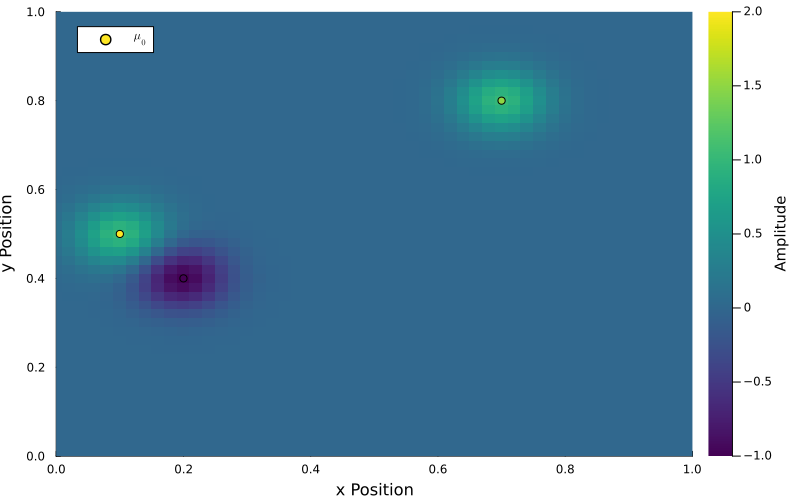

In [8]:
ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0")

### SFW

In [9]:
# Define λ the regularisation parameter
λ = 10

prob = BLASSO(y, ops, domain, λ)

BLASSO([-0.011027129287807125, -0.00404571316306778, 0.0066522357247204445, -0.018521131516513436, 0.0022222379104063677, -0.010377160263185177, -0.00026684567381316806, 0.013001782215523085, -0.022551357619061164, 0.006477147483566904  …  -0.021383035733677377, 0.0004534567867745486, -0.031004858720426076, 0.03100635635128155, -0.007140349985604715, -0.0024762087688179886, 0.026577151366580773, 0.023590695360136058, 0.01315038144716473, -0.01171038254245697], Operators(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601), var"#Φ#30"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601)), var"#adjΦ#31"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Mat

In [10]:
solve!(prob, :SFW, options=Dict(:maxits => 100))

BLASSO([-0.011027129287807125, -0.00404571316306778, 0.0066522357247204445, -0.018521131516513436, 0.0022222379104063677, -0.010377160263185177, -0.00026684567381316806, 0.013001782215523085, -0.022551357619061164, 0.006477147483566904  …  -0.021383035733677377, 0.0004534567867745486, -0.031004858720426076, 0.03100635635128155, -0.007140349985604715, -0.0024762087688179886, 0.026577151366580773, 0.023590695360136058, 0.01315038144716473, -0.01171038254245697], Operators(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601), var"#Φ#30"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601)), var"#adjΦ#31"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Mat

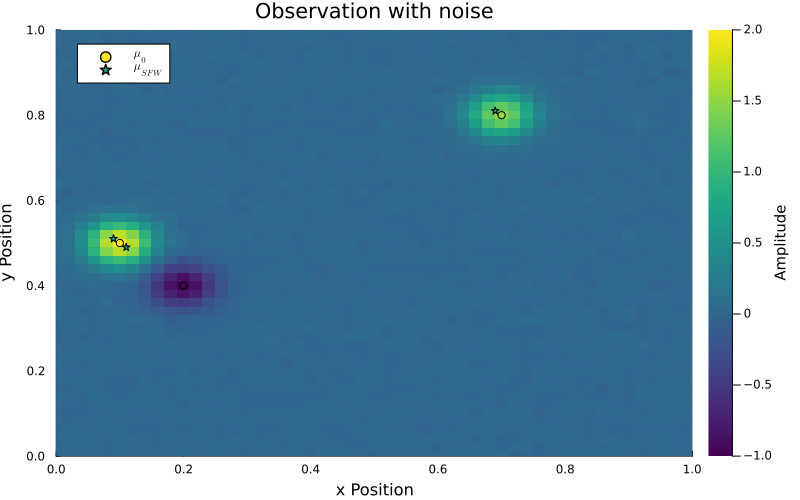

In [11]:
plt_sfw = deepcopy(plt_obs_noise)

plot_spikes!(plt_sfw, prob.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)